# Explore here

In [21]:
# System imports
import os
import shutil

# Image manipulation
from PIL import Image
from matplotlib.image import imread
from skimage import io
from skimage.transform import resize

# Data manipulation
import numpy as np
from sklearn.model_selection import train_test_split

# Data visualization libraries
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

El conjunto de datos se encuentra en Kaggle y tendrás que acceder a ella para descargarlos. La competición la puedes encontrar aquí (o copiando y pegando el siguiente enlace en tu navegador: https://www.kaggle.com/c/dogs-vs-cats/data)

Descarga la carpeta datatset y descomprime los archivos. Ahora tendrás una carpeta llamada tren que contiene 25.000 archivos de imagen (formato .jpg) de perros y gatos. Las fotos están etiquetadas por su nombre de archivo, con la palabra perro o gato.

In [22]:
import pandas as pd
dataset = pd.read_csv('../data/raw/sampleSubmission.csv')
dataset.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [23]:
import os

# Ruta a la carpeta que contiene las imágenes de perros
train_subfolder = "../data/raw/train"

# Obtener una lista de todos los nombres de archivo de imágenes de perros
image_files = os.listdir(train_subfolder)

# Imprimir la lista de nombres de archivo de imágenes de perros
print(image_files)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/train'

Paso 2: Visualiza la información de entrada
El primer paso cuando nos enfrentamos a un problema de clasificación de imágenes es obtener toda la información posible a través de ellas. Por lo tanto, carga e imprime las primeras nueve fotos de perros en una sola figura. Repite lo mismo para los gatos. Puedes ver que las fotos son a color y tienen diferentes formas y tamaños.

In [ ]:
print(dataset.columns)

Index(['id', 'label'], dtype='object')


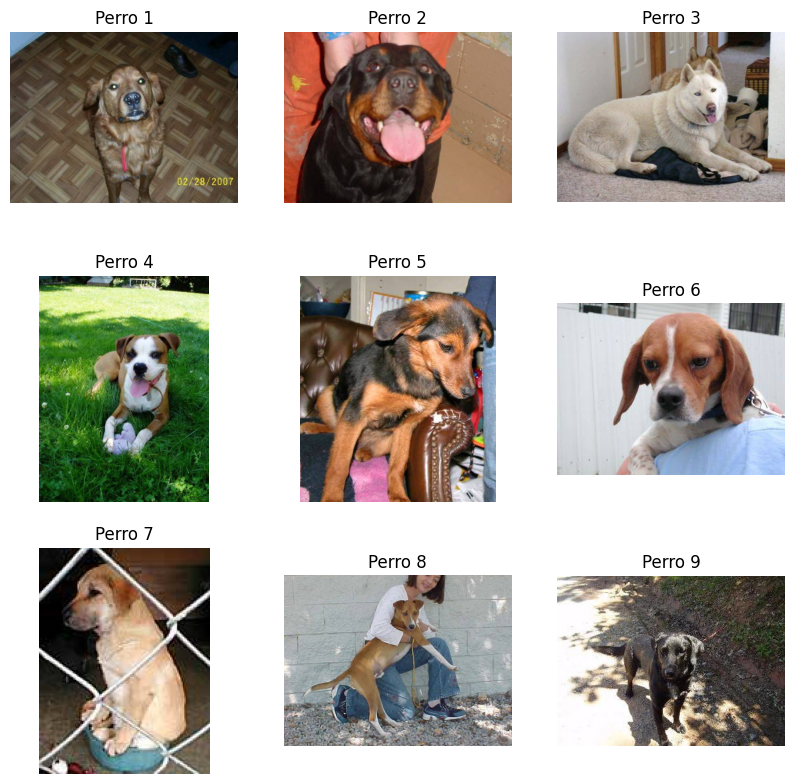

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta a la carpeta que contiene las imágenes de perros y gatos
train_folder = "../data/raw/train"

# Obtener una lista de todos los nombres de archivo de imágenes en la carpeta de entrenamiento
image_files = os.listdir(train_folder)

# Filtrar solo las imágenes de perros
dog_image_files = [file for file in image_files if 'dog' in file]

# Cargar e imprimir las primeras nueve fotos de perros en una sola figura
plt.figure(figsize=(10, 10))
for i, filename in enumerate(dog_image_files[:9]):
    image_path = os.path.join(train_folder, filename)
    image = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f'Perro {i+1}')
    plt.axis('off')
plt.show()



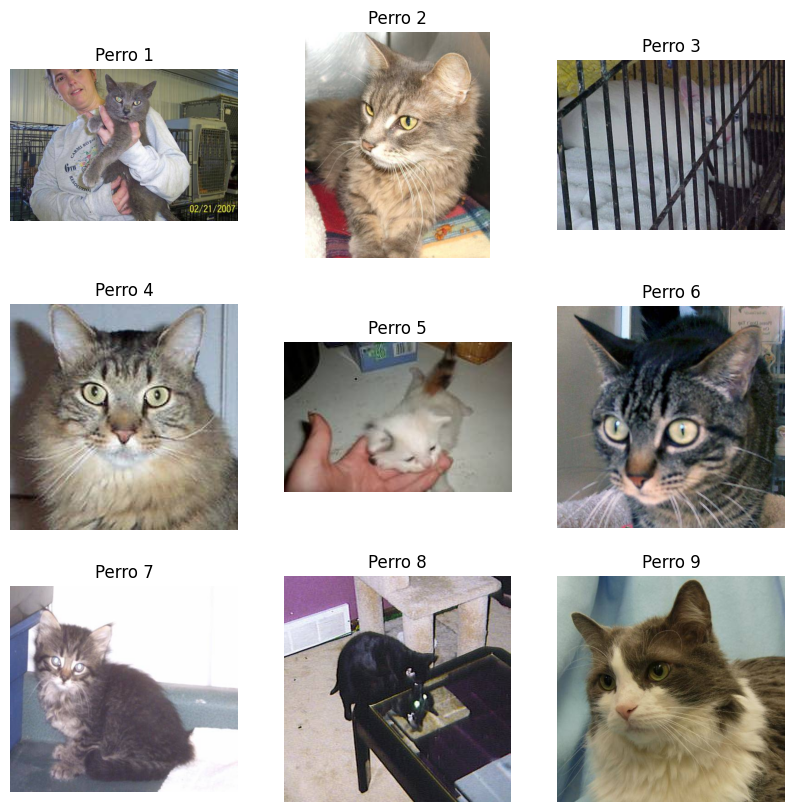

In [ ]:
# Para gatos
# Ruta a la carpeta que contiene las imágenes de perros y gatos
train_folder = "../data/raw/train"

# Obtener una lista de todos los nombres de archivo de imágenes en la carpeta de entrenamiento
image_files = os.listdir(train_folder)

# Filtrar solo las imágenes de perros
cat_image_files  = [file for file in image_files if 'cat' in file]

# Cargar e imprimir las primeras nueve fotos de perros en una sola figura
plt.figure(figsize=(10, 10))
for i, filename in enumerate(cat_image_files[:9]):
    image_path = os.path.join(train_folder, filename)
    image = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f'Perro {i+1}')
    plt.axis('off')
plt.show()





 


In [ ]:
# function to separate the images by name
def organize_images(train_folder):
    cat_folder = os.path.join(train_folder, 'cat')
    dog_folder = os.path.join(train_folder, 'dog')

    # Checks if the cat and dog folders exist, if not, creates them
    for folder in [cat_folder, dog_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)

    # Move only images to the corresponding folders
    images = [file for file in os.listdir(train_folder) if file.lower().endswith(('.jpg'))]
    for image in images:
        if 'cat' in image:
            shutil.move(os.path.join(train_folder, image), os.path.join(cat_folder, image))
        elif 'dog' in image:
            shutil.move(os.path.join(train_folder, image), os.path.join(dog_folder, image))

Esta variedad de tamaños y formatos debe solucionarse antes de entrar el modelo. Asegúrate de que todas tengan un tamaño fijo de 200x200 píxeles.

Si no tienes más de 12 gigabytes de RAM, carga las imágenes progresivamente usando la clase Keras ImageDataGenerator y la función flow_from_directory(). Esto será más lento de ejecutar pero se ejecutará en hardware de peor capacidad. Esta función prefiere que los datos se dividan en directorios train/ y test/ separados, y debajo de cada directorio para tener un subdirectorio para cada clase.

Una vez tengas todas las imágenes procesadas, crea un objeto ImageDataGenerator para datos de entrenamiento y prueba. Luego pasa la carpeta que tiene datos de entrenamiento al objeto trdata y, de manera similar, pasa la carpeta que tiene datos de prueba al objeto tsdata. De esta forma, se etiquetarán las imágenes automáticamente y estará todo listo para entrar a la red.

In [ ]:
# organize the images by name
organize_images(train_folder)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

# Define a few rules for DataGen
train_folder = "../data/raw/cats&dogs/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_folder,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_folder,
    target_size = image_size,
    classes = ["test1"] 
)





Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [ ]:
#make the network
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-07 17:40:43.597389: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-07 17:40:44.211554: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-07 17:40:44.383949: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2024-05-07 17:40:44.726713: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-05-07 17:40:44.819226: W external/local_tsl/tsl/fr

In [ ]:
class_indices = train_data.class_indices
print(class_indices)

{'dog': 0, 'cat': 1}


In [ ]:
# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])
model.fit(train_data, epochs=1)

ValueError: Must provide at least one structure

In [ ]:
checkpoint = ModelCheckpoint("..models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

In [ ]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

In [ ]:
img = image.load_img(r"..\data\raw\train\test1/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")